# Single Fluid Solution

## Alfven Mode

Here we show $\delta \mathbf v$ and $\delta \mathbf B$. First we need a plasma. 

In [1]:
from wave_instab_showcase.physics.plasma_isotropic import IsotropicPlasma


the_plasma = IsotropicPlasma()  # We just use default parameters for the plasma

Then we take the Alfven mode. For the time being, remember it is the sub 1. 

In [2]:
import numpy as np

the_wave = the_plasma.f_get_wave_modes(np.array((1.0, 0.0, 2.0)))[1]

Now we want to plot the delta B and delta v. Since $k_{\min} = 1$, in the length of $2\pi$ there is 1 wave. We could have a range of $10\pi$, and we have 100 points in each direction. 

In [7]:
from wave_instab_showcase.data_process.mesh_2d import Cadence, Mesh
from wave_instab_showcase.physics.plasma_isotropic import I_BY, I_VY


the_mesh = Mesh(Cadence(0.0, 100, 0.1 * np.pi), Cadence(0.0, 100, 0.1 * np.pi))
sub_v = I_VY
sub_b = I_BY
v_plot = the_mesh.get_scalar(
    the_wave.make_scalar_taker_zox_at_t_0(sub_v))
b_plot = the_mesh.get_scalar(
    the_wave.make_scalar_taker_zox_at_t_0(sub_b))
v_plot.shape, b_plot.shape

((100, 100), (100, 100))

Now as the data are yielded, we plot it on a figure. Here we just want a quick show instead of a figure of publication quality. 

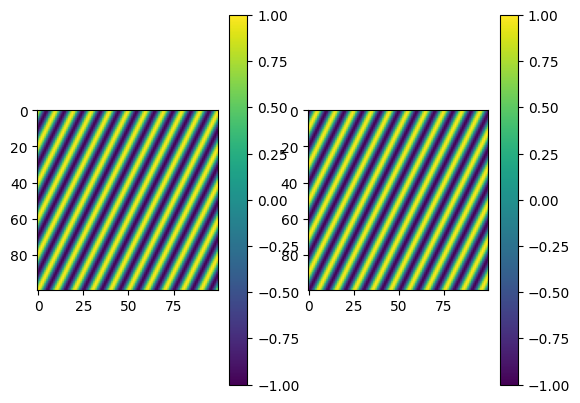

In [17]:
import matplotlib.pyplot as plt

plt.subplot(121)
plt.imshow(v_plot.T)
plt.colorbar()
plt.subplot(122)
plt.imshow(b_plot.T)
plt.colorbar()

## Slow Mode